In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = fetch_ucirepo(id=519)

features = dataset.data.features
target = dataset.data.targets

# uzyskanie jednostki jaka występuje w opracowaniu
features.loc[:, "platelets"] = features["platelets"] / 1000

df = pd.concat([features, target], axis=1)

df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265.00000,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263.35803,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162.00000,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210.00000,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327.00000,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155.00000,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270.00000,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742.00000,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140.00000,1.4,140,1,1,280,0


In [3]:
category_features = dataset.data.features[
    ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]
]
numeric_features = dataset.data.features[
    [
        "age",
        "creatinine_phosphokinase",
        "ejection_fraction",
        "platelets",
        "serum_creatinine",
        "serum_sodium",
        "time",
    ]
]

df_category = pd.concat([category_features, target], axis=1)
df_numeric = pd.concat([numeric_features, target], axis=1)

In [4]:
for col in df_category.columns:
    df_category[col] = df_category[col].astype("category")

### Statystyczny opis danych

#### Dane numeryczne

##### Wszyscy pacjenci

In [5]:
df_numeric.describe().round(2)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,death_event
count,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00
mean,60.83,581.84,38.08,263.36,1.39,136.63,130.26,0.32
std,11.89,970.29,11.83,97.80,1.03,4.41,77.61,0.47
min,40.00,23.00,14.00,25.10,0.50,113.00,4.00,0.00
25%,51.00,116.50,30.00,212.50,0.90,134.00,73.00,0.00
50%,60.00,250.00,38.00,262.00,1.10,137.00,115.00,0.00
75%,70.00,582.00,45.00,303.50,1.40,140.00,203.00,1.00
max,95.00,7861.00,80.00,850.00,9.40,148.00,285.00,1.00


##### Pacjenci żyjący

In [6]:
df_numeric[df_numeric["death_event"] == 0].describe().round(2)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,death_event
count,203.00,203.00,203.00,203.00,203.00,203.00,203.00,203.0
mean,58.76,540.05,40.27,266.66,1.18,137.22,158.34,0.0
std,10.64,753.80,10.86,97.53,0.65,3.98,67.74,0.0
min,40.00,30.00,17.00,25.10,0.50,113.00,12.00,0.0
25%,50.00,109.00,35.00,219.50,0.90,135.50,95.00,0.0
50%,60.00,245.00,38.00,263.00,1.00,137.00,172.00,0.0
75%,65.00,582.00,45.00,302.00,1.20,140.00,213.00,0.0
max,90.00,5209.00,80.00,850.00,6.10,148.00,285.00,0.0


##### Pacjenci zmarli

In [7]:
df_numeric[df_numeric["death_event"] == 1].describe().round(2)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,death_event
count,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.0
mean,65.22,670.20,33.47,256.38,1.84,135.38,70.89,1.0
std,13.21,1316.58,12.53,98.53,1.47,5.00,62.38,0.0
min,42.00,23.00,14.00,47.00,0.60,116.00,4.00,1.0
25%,55.00,128.75,25.00,197.50,1.08,133.00,25.50,1.0
50%,65.00,259.00,30.00,258.50,1.30,135.50,44.50,1.0
75%,75.00,582.00,38.00,311.00,1.90,138.25,102.25,1.0
max,95.00,7861.00,70.00,621.00,9.40,146.00,241.00,1.0


#### Dane kategoryczne

##### Wszyscy pacjenci

In [8]:
stats = pd.DataFrame()

for col in df_category.columns:
    counts = df_category[col].value_counts(dropna=False)
    percents = df_category[col].value_counts(normalize=True, dropna=False) * 100
    stats[col] = [
        counts.get(0, 0),
        counts.get(1, 0),
        percents.get(0, 0),
        percents.get(1, 0),
    ]

stats.index = ["# 0", "# 1", "% 0", "% 1"]

stats = stats.T

stats.round(2)

,# 0,# 1,% 0,% 1
anaemia,170.0,129.0,56.86,43.14
diabetes,174.0,125.0,58.19,41.81
high_blood_pressure,194.0,105.0,64.88,35.12
sex,105.0,194.0,35.12,64.88
smoking,203.0,96.0,67.89,32.11
death_event,203.0,96.0,67.89,32.11


##### Pacjenci żyjący

In [9]:
stats = pd.DataFrame()

for col in df_category[df_category["death_event"] == 0].columns:
    counts = df_category[df_category["death_event"] == 0][col].value_counts(
        dropna=False
    )
    percents = (
        df_category[df_category["death_event"] == 0][col].value_counts(
            normalize=True, dropna=False
        )
        * 100
    )
    stats[col] = [
        counts.get(0, 0),
        counts.get(1, 0),
        percents.get(0, 0),
        percents.get(1, 0),
    ]

stats.index = ["# 0", "# 1", "% 0", "% 1"]

stats = stats.T

stats.round(2)

,# 0,# 1,% 0,% 1
anaemia,120.0,83.0,59.11,40.89
diabetes,118.0,85.0,58.13,41.87
high_blood_pressure,137.0,66.0,67.49,32.51
sex,71.0,132.0,34.98,65.02
smoking,137.0,66.0,67.49,32.51
death_event,203.0,0.0,100.00,0.00


##### Pacjenci zmarli

In [10]:
stats = pd.DataFrame()

for col in df_category[df_category["death_event"] == 1].columns:
    counts = df_category[df_category["death_event"] == 1][col].value_counts(
        dropna=False
    )
    percents = (
        df_category[df_category["death_event"] == 1][col].value_counts(
            normalize=True, dropna=False
        )
        * 100
    )
    stats[col] = [
        counts.get(0, 0),
        counts.get(1, 0),
        percents.get(0, 0),
        percents.get(1, 0),
    ]

stats.index = ["# 0", "# 1", "% 0", "% 1"]

stats = stats.T

stats.round(2)

,# 0,# 1,% 0,% 1
anaemia,50.0,46.0,52.08,47.92
diabetes,56.0,40.0,58.33,41.67
high_blood_pressure,57.0,39.0,59.38,40.62
sex,34.0,62.0,35.42,64.58
smoking,66.0,30.0,68.75,31.25
death_event,0.0,96.0,0.00,100.00


### Liczba wartości odstających

In [11]:
df = df_numeric[["creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium"]]
outliers_summary = []

for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    left_outliers = (df[col] < lower_bound).sum()
    right_outliers = (df[col] > upper_bound).sum()
    total_outliers = left_outliers + right_outliers

    outliers_summary.append({
        'Cecha': col,
        'Dolna granica': lower_bound,
        'Górna granica': upper_bound,
        'Liczba wartości odstających po lewej': left_outliers,
        'Liczba wartości odstających po prawej': right_outliers,
        'Łączna liczba wartości odstających': total_outliers
    })


outliers_df = pd.DataFrame(outliers_summary)
outliers_df

,Cecha,Dolna granica,Górna granica,Liczba wartości odstających po lewej,Liczba wartości odstających po prawej,Łączna liczba wartości odstających
0,creatinine_phosphokinase,-581.75,1280.25,0,29,29
1,ejection_fraction,7.50,67.50,0,2,2
2,platelets,76.00,440.00,7,14,21
3,serum_creatinine,0.15,2.15,0,29,29
4,serum_sodium,125.00,149.00,4,0,4


#### Rozkład zmiennych z wartościami odstającymi

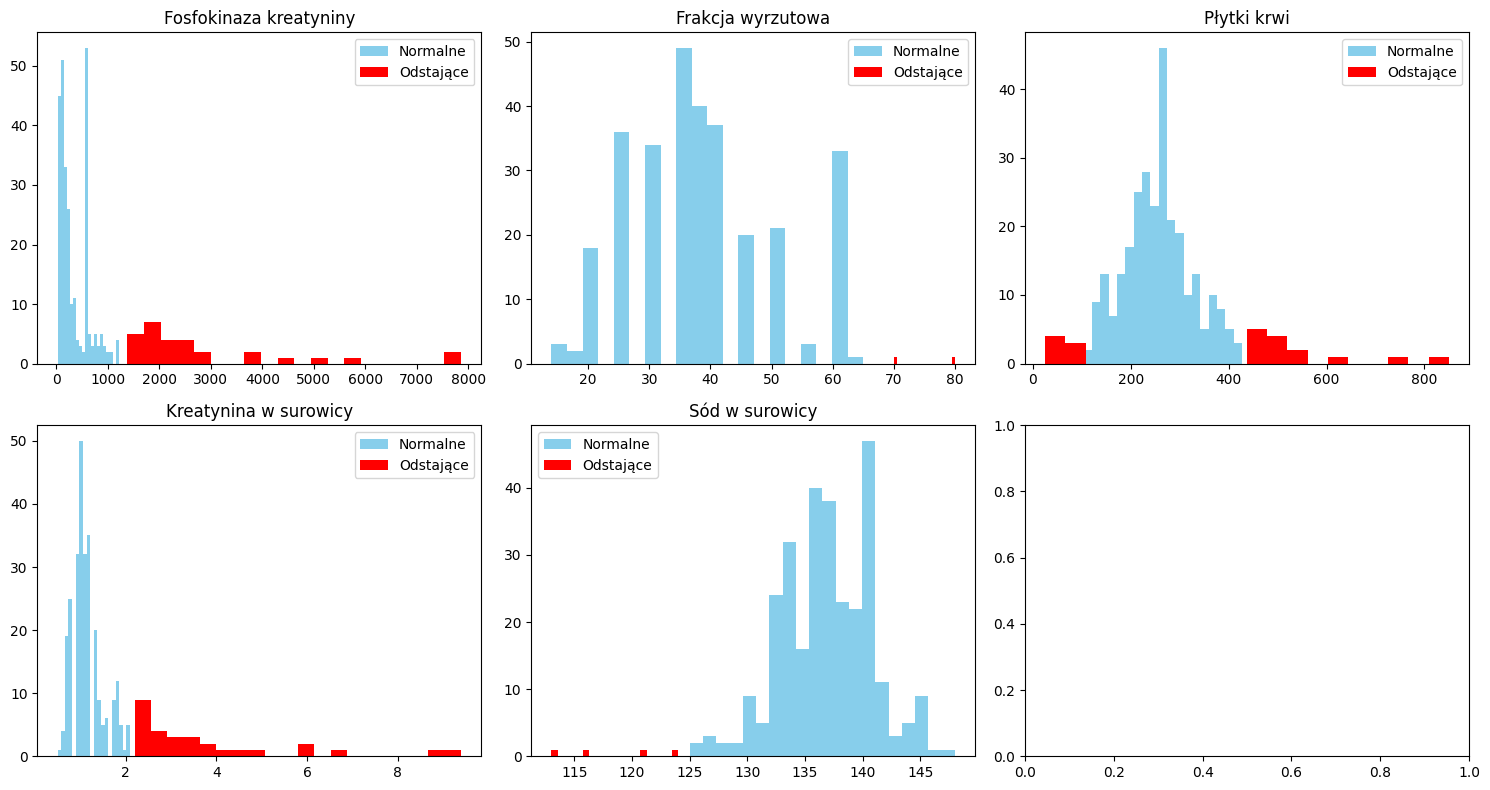

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()
titles = ["Fosfokinaza kreatyniny", "Frakcja wyrzutowa", "Płytki krwi", "Kreatynina w surowicy", "Sód w surowicy"]

for i, col in enumerate(df.columns):
    data = df[col].dropna()
    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    normal_values = data[(data >= lower_bound) & (data <= upper_bound)]
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    ax = axes[i]
    ax.hist(normal_values, bins=20, color='skyblue', label='Normalne')
    ax.hist(outliers, bins=20, color='red', label='Odstające')
    ax.set_title(titles[i])
    ax.legend()

plt.tight_layout()
plt.show()